In [1]:
!pip install pandas numpy matplotlib scikit-learn tensorflow yfinance



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf

# Load the data
df = yf.download('TCS.NS', start='2020-01-01', end='2023-01-01')
df.head()



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,2168.000000,2183.899902,2154.000000,2167.600098,1984.892456,1354908
2020-01-02,2179.949951,2179.949951,2149.199951,2157.649902,1975.780640,2380752
2020-01-03,2164.000000,2223.000000,2164.000000,2200.649902,2015.156494,4655761
2020-01-06,2205.000000,2225.949951,2187.899902,2200.449951,2014.973267,3023209
2020-01-07,2200.500000,2214.649902,2183.800049,2205.850098,2019.918579,2429317


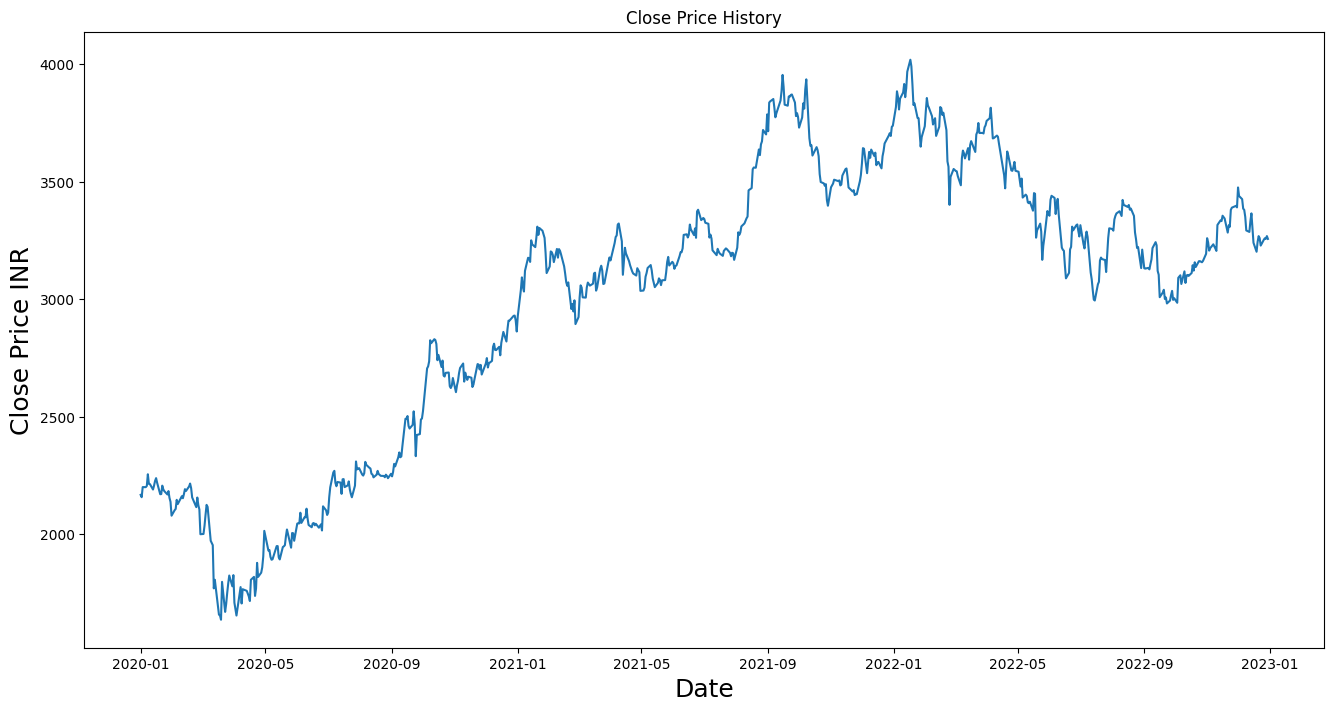

In [4]:
# Visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()


In [5]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .95))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [11]:
from tensorflow.keras.layers import Input

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [12]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


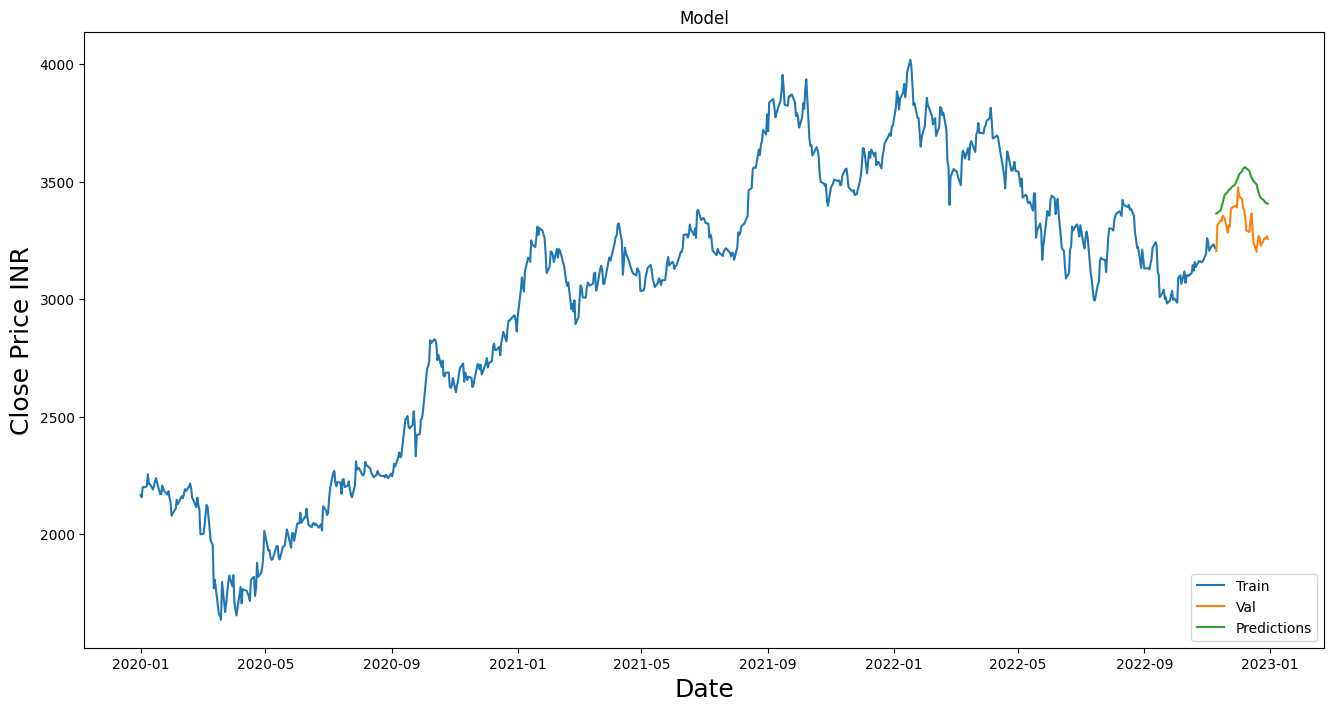

,Close,Predictions
Date,,
2022-11-10,3205.649902,3364.922607
2022-11-11,3315.949951,3367.781006
2022-11-14,3335.500000,3377.966553
2022-11-15,3332.600098,3392.829102
2022-11-16,3355.350098,3409.043213
2022-11-17,3349.000000,3426.719482
2022-11-18,3343.449951,3443.262207
2022-11-21,3283.500000,3457.416748
2022-11-22,3314.949951,3464.100830


In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:].copy()  # Use .copy() to avoid SettingWithCopyWarning
valid.loc[:, 'Predictions'] = predictions  # Use .loc to set the 'Predictions' column

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
valid
